### Import files

In [20]:
from control import PedestrianController
from run import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1

In [21]:
runsim('./Test_Cases/task1.dat')

# Task 2

A pedestrian at (5, 25) walks towards a target at (25, 25).
It performs 25 steps so in the mean-time reaching its target.

In [22]:
runsim('./Test_Cases/task2.dat')

# Task 3

5 pedestrians are located in a circle with radius 30m around the target.
In case of non-absorbing targets, only one pedestrian claims the target while the others gather around.

In [23]:
runsim('./Test_Cases/task3_without_devour.dat')

In case of absorbing targets, all pedestrians eventually reach the target, one-by-one.

In [24]:
runsim('./Test_Cases/task3_with_devour.dat')

# Task 4

When using the standard distance-based cost function, the pedestrians fail the chicken-test and get stuck in the cage.

In [25]:
runsim('./Test_Cases/task4_standard.dat')

The dijkstra-algorithm solves this ptoblem. All pedestrians avoid the obstacle and reach their target.
This is visualized by the overlayed cost-function flowing around the obstacle.

In [26]:
runsim('./Test_Cases/task4_dijkstra.dat')

The corridor example for this task has been implemented as code instead of file since there are multiple obstacles.

In [27]:
in_val = input('Implement dijkstra? y/n:')
if in_val == 'y':
    dijkstra = True
elif in_val == 'n':
    dijkstra = False
else:
    print("ERROR: Invalid value. Write 'y' or 'n'")
    exit()

pedestrian_loc = [(5, 23), (3, 27), (7, 32)]

obstacles_loc = [(x, 20) for x in range(0, 20)] + [(x, 35) for x in range(0, 20)] + [(20, y) for y in range(20, 26)] + [(20, y) for y in range(30, 36)] + [(x, 20) for x in range(30, 50)] + [(x, 35) for x in range(30, 50)] + [(30, y) for y in range(20, 26)] + [(30, y) for y in range(30, 36)] + [(x, 30) for x in range(20, 30)] + [(x, 28) for x in range(20, 30)] + [(x, 25) for x in range(20, 30)] + [(29,29)]

targets_loc = [(40, 28)]

controller = PedestrianController(50, 50, pedestrian_loc,  
                                    targets_loc, obstacles_loc, None, [1.3], 100, True, dijkstra, True, True)
controller.init_costs()
controller.run()

KeyboardInterrupt: 

# Task 5
## Test 1: RiMEA scenario 1

SystemExit: 

C:\Users\Laptop\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Text(0.5, 1.0, 'Expected')

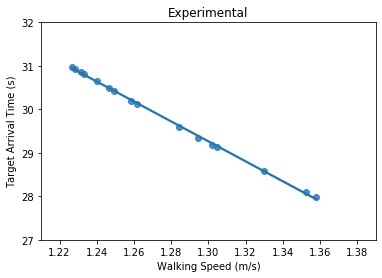

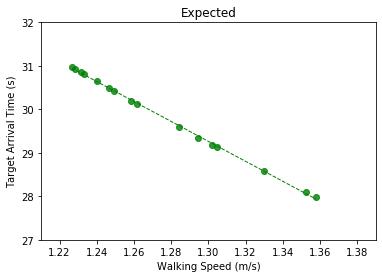

In [ ]:
from numpy.random import default_rng
import random
import seaborn as sns
import matplotlib.pyplot as plt

times=[]
speeds=[]
times_expected=[]
hallway_distance =41

#Run a series of simulations and record the time pedestrian takes to reach target 
#starting with a speed between 1.2 and 1.4 m/s
for i in range (0,15):

    width = 50
    height = 8
    
    ped_start = random.randint(3, 4)
    pedestrian_loc = [(2, 3)]

    obstacles_loc = [(x, 2) for x in range(1, hallway_distance)] + [(x, 5) for x in range(1, hallway_distance)]

    targets_loc = [(hallway_distance-1, y) for y in range(3, 5)]

    speed = []
    num = random.uniform(1.2, 1.4)
    speed.append(num)
    speeds.append(num)
    
    #Create expected value for speed and time    
    times_expected.append((hallway_distance-3)/num)

    points = None

    controller = PedestrianController(width, height, pedestrian_loc,  
                                    targets_loc, obstacles_loc, points, speed, 10000, True, True, True,False,True)

    controller.init_costs()
    controller.run()
    times.extend(controller.finishing_times)
 
#Running the 1.33 m/s verification run and add to the rest of the collected data

controller = PedestrianController(width, height, pedestrian_loc,  
                                    targets_loc, obstacles_loc, points, [1.33], 10000, True, True, True,False,True)
speeds.append(1.33)

#Create expected values for speed and time 
times_expected.append((hallway_distance-3)/1.33)

controller.init_costs()
controller.run()
times.extend(controller.finishing_times)



#Create a plot to analyze results wiht 75% confidence interval
plt.figure(1)
sns.regplot(speeds, times, ci=75)
plt.ylim(27, 32)
plt.xlim(1.21, 1.39)
#naming the x axis
plt.xlabel('Walking Speed (m/s)')
# naming the y axis
plt.ylabel('Target Arrival Time (s)') 
#Plot Title
plt.title("Experimental")



#plotting the expected values
plt.figure(2)
sns.regplot(speeds, times_expected,ci= None, scatter_kws={"color": "green"},line_kws={"color": "green","linewidth":1,"linestyle":'dashed'})
plt.ylim(27, 32)
plt.xlim(1.21, 1.39)

#naming the x axis
plt.xlabel('Walking Speed (m/s)')
# naming the y axis
plt.ylabel('Target Arrival Time (s)')  
#Plot Title
plt.title("Expected")

## Test 2: RiMEA scenario 4

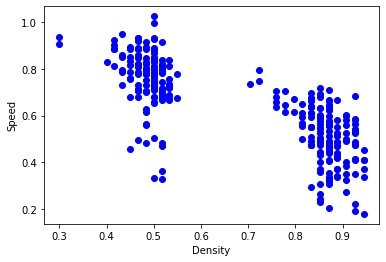

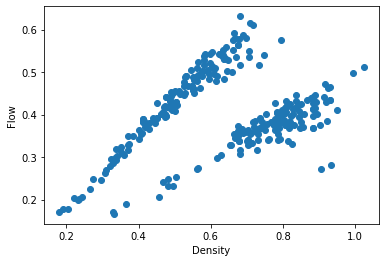

In [55]:
from numpy.random import default_rng
import random
import matplotlib.pyplot as plt
import numpy

corridor_width = 30
corridor_height = 6

def spawn_by_density(density, x1, x2):
    width = (x2 - x1) + 1
    n_peds = int(corridor_height*width*density)
    pedestrian_loc = rng.choice([(x, y) for x in range(x1, x2+1) for y in range(1, corridor_height+1)], size=n_peds, replace=False)
    return pedestrian_loc


rng = default_rng()

# spawn pedestrians in a certain area by density
pedestrian_loc = np.concatenate([spawn_by_density(0.2, 1, 5), spawn_by_density(0.3, 6, 10), spawn_by_density(0.4, 11, 15), 
spawn_by_density(0.6, 16, 20), spawn_by_density(0.8, 20, 25), spawn_by_density(1, 26, 30)], axis=0)
size_pedestrians = len(pedestrian_loc)

obstacles_loc = []

targets_loc = [(30+2, y) for y in range(1, corridor_height+1)]

speed = []
for i in range(0, size_pedestrians):
    num = random.uniform(1.2, 1.4)
    speed.append(num)

points = [] # [(75, 5), (75, 6), (68, 5)]

areas = [[(1, corridor_height+1), (10, 1)], [(11, corridor_height+1), (21, 1)], [(21, corridor_height+1), (31, 1)]]
controller = PedestrianController(35, corridor_height+2, pedestrian_loc, 
                                    targets_loc, obstacles_loc, points, speed, -1, True, True, True, True)
controller.set_areas(areas)

controller.init_costs()
controller.run()

densities = []
speeds = []
for coordinate in controller.get_coordinates():
    if coordinate:
        for density, speed in coordinate:
            plt.plot(speed, density, 'bo')
            densities.append(density)
            speeds.append(speed)
"""
mymodel = numpy.poly1d(numpy.polyfit(x_coor, y_coor, 3))
myline = numpy.linspace(min(x_coor), max(x_coor), max(y_coor))
plt.plot(myline, mymodel(myline))
"""
plt.ylabel('Speed')
plt.xlabel('Density')
plt.show()

flow = np.array(speeds)*np.array(densities)
plt.scatter(densities, flow)
plt.ylabel('Flow')
plt.xlabel('Density')
plt.show()



## Test 3: RiMEA scenario 6


In [ ]:
from numpy.random import default_rng

rng = default_rng()
pedestrian_loc = rng.choice([(x, y) for x in range(1, 21) for y in range(11, 13)], size=20, replace=False)

obstacles_loc = [(x, 10) for x in range(1, 25)] + [(x, 13) for x in range(1, 28)] + [(25, y) for y in range(1, 11)] + [(28, y) for y in range(1, 14)]

targets_loc = [(x, 1) for x in range(26, 28)]

controller = PedestrianController(30, 15, pedestrian_loc,  
                                    targets_loc, obstacles_loc, None, [1.3], 10000, True, True, True)
controller.init_costs()
controller.run()

## Test 4: RiMEA scenario 7

In [ ]:
from numpy.random import default_rng
import random
import matplotlib.pyplot as plt


def get_speed(age):
    speed = 0
    sigma = 0
    if 20 <= age <= 50:
        speed = 1.6 - 0.2/30*(age - 20)
        sigma = 0.3 - 0.05/30*(age - 20)
    elif 50 <= age <= 75:
        speed = 1.4 - 0.45/25*(age - 50)
        sigma = 0.25 - 0.05/25*(age - 50)
    elif 75 <= age <= 80:
        speed = 0.95 - 0.25/5*(age - 75)
        sigma = 0.2 - 0.1/5*(age - 75)
    return speed, sigma

ages = []
actual_speeds = []
path_length = 10
for i in range(50):
    age = np.random.randint(20, 80)
    mean, sigma = get_speed(age)
    speed = np.random.normal(mean, sigma)
    controller = PedestrianController(15, 5, [(1, 3)],  
                                    [(1 + path_length, 3)], [], [], [speed], -1, True, True, True, end_on_reached_targets=True)
    print("pedestrian of age", age, "and speed", speed, "is expected to take", path_length/speed, "seconds. Mean:", path_length/mean)
    controller.init_costs()
    controller.run()
    ages.append(age)
    actual_speeds.append(path_length/(controller.finishing_times[0]))


In [ ]:
plt.plot([20, 50, 75, 80], [1.9, 1.65, 1.1, 0.8])
plt.plot([20, 50, 75, 80], [1.6, 1.4, 0.95, 0.7])
plt.plot([20, 50, 75, 80], [1.3,  1.15, 0.75, 0.6])

plt.scatter(ages, [s for s in actual_speeds])
plt.plot()